In [1]:
from base import *

num_class = 10
dataset = "fashion"

/home/hsiymsr/abhi6793/.conda/envs/thesis/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hsiymsr/abhi6793/.conda/envs/thesis/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hsiymsr/abhi6793/.conda/envs/thesis/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hsiymsr/abhi6793/.c

Overall accuracy

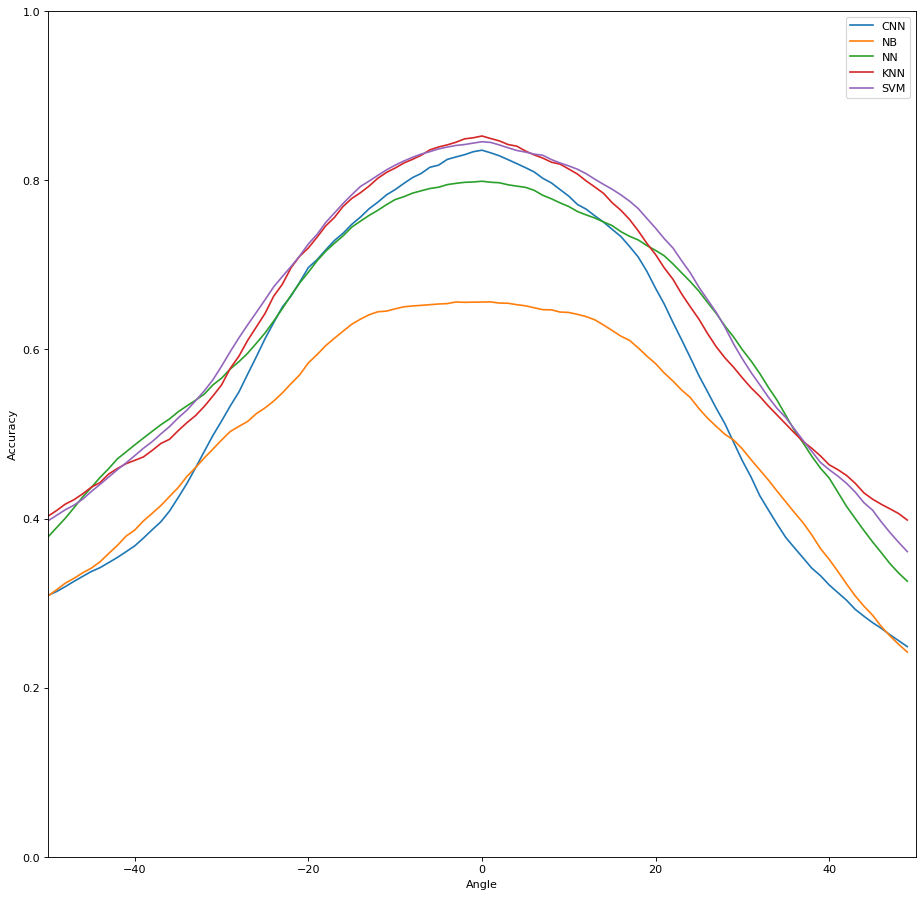

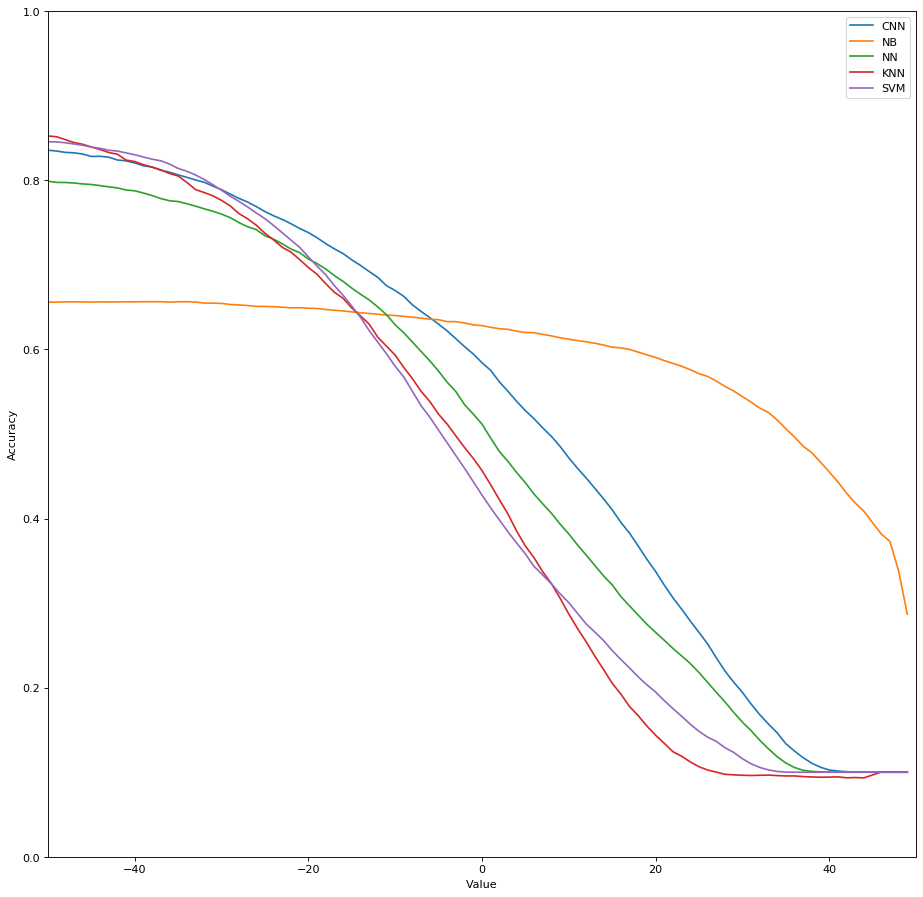

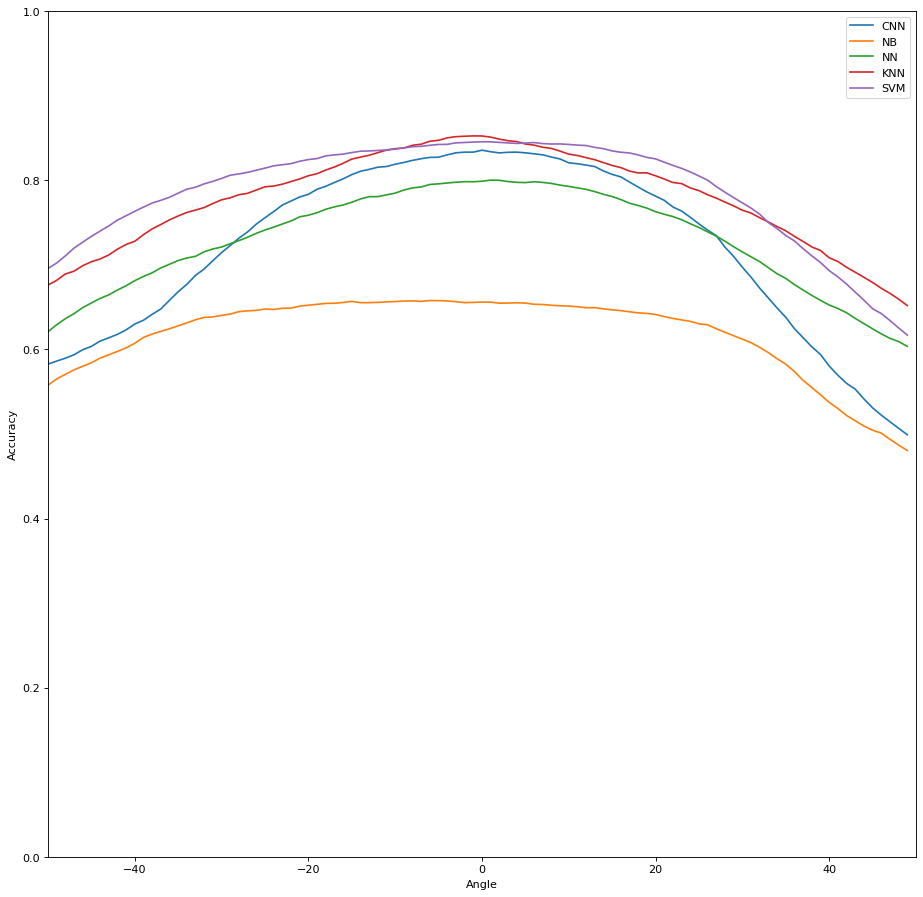

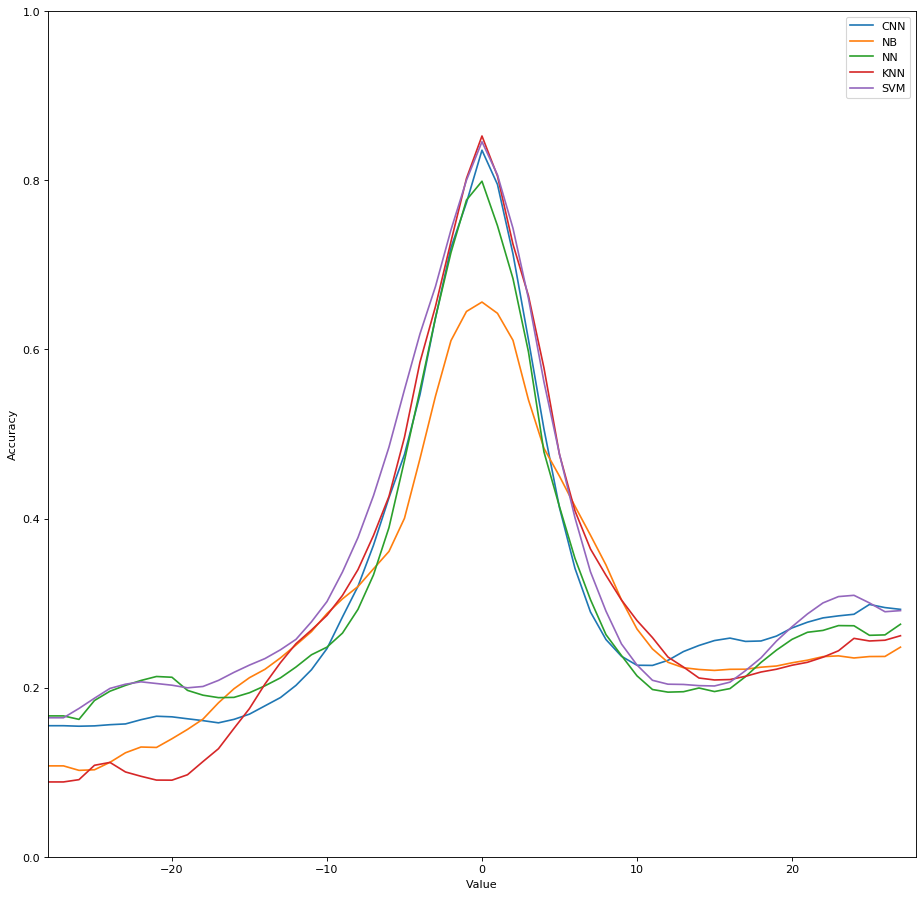

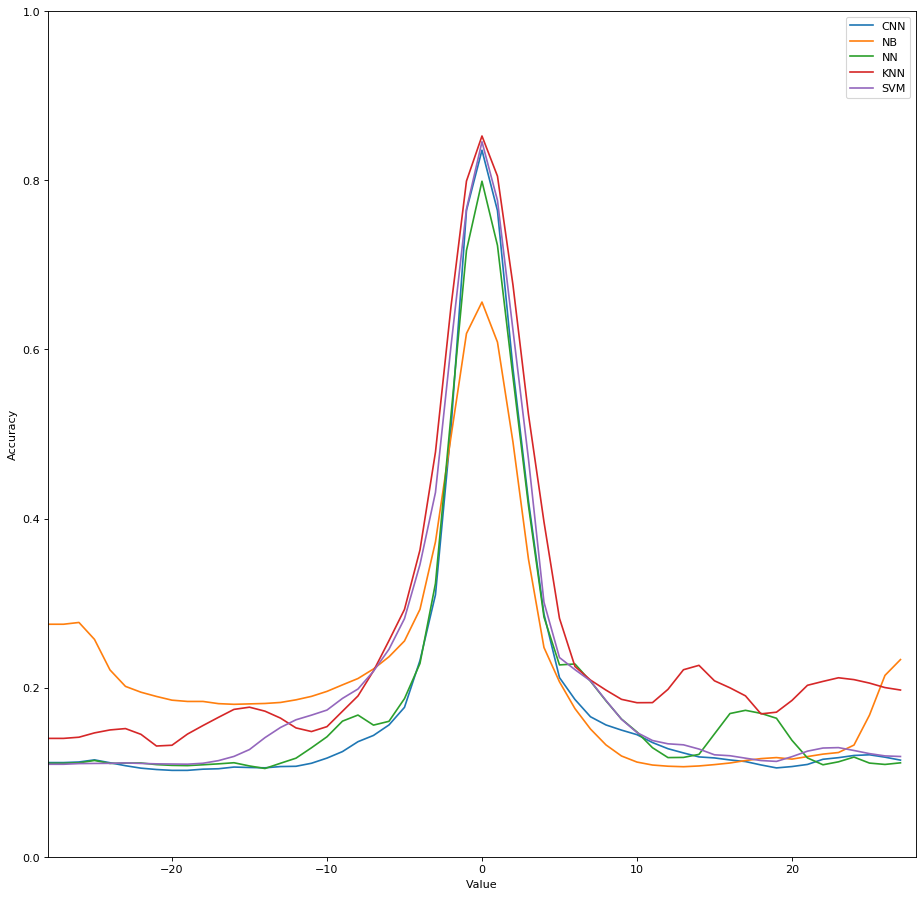

In [2]:
for MT in [Rotate, Shade, Shear, ShiftX, ShiftY]:
    getDatasetAccuracyPlot(MT)

/lustre/work/hsiymsr/abhi6793/thesis-ms/fashion/base.py:613: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,5,j+1)


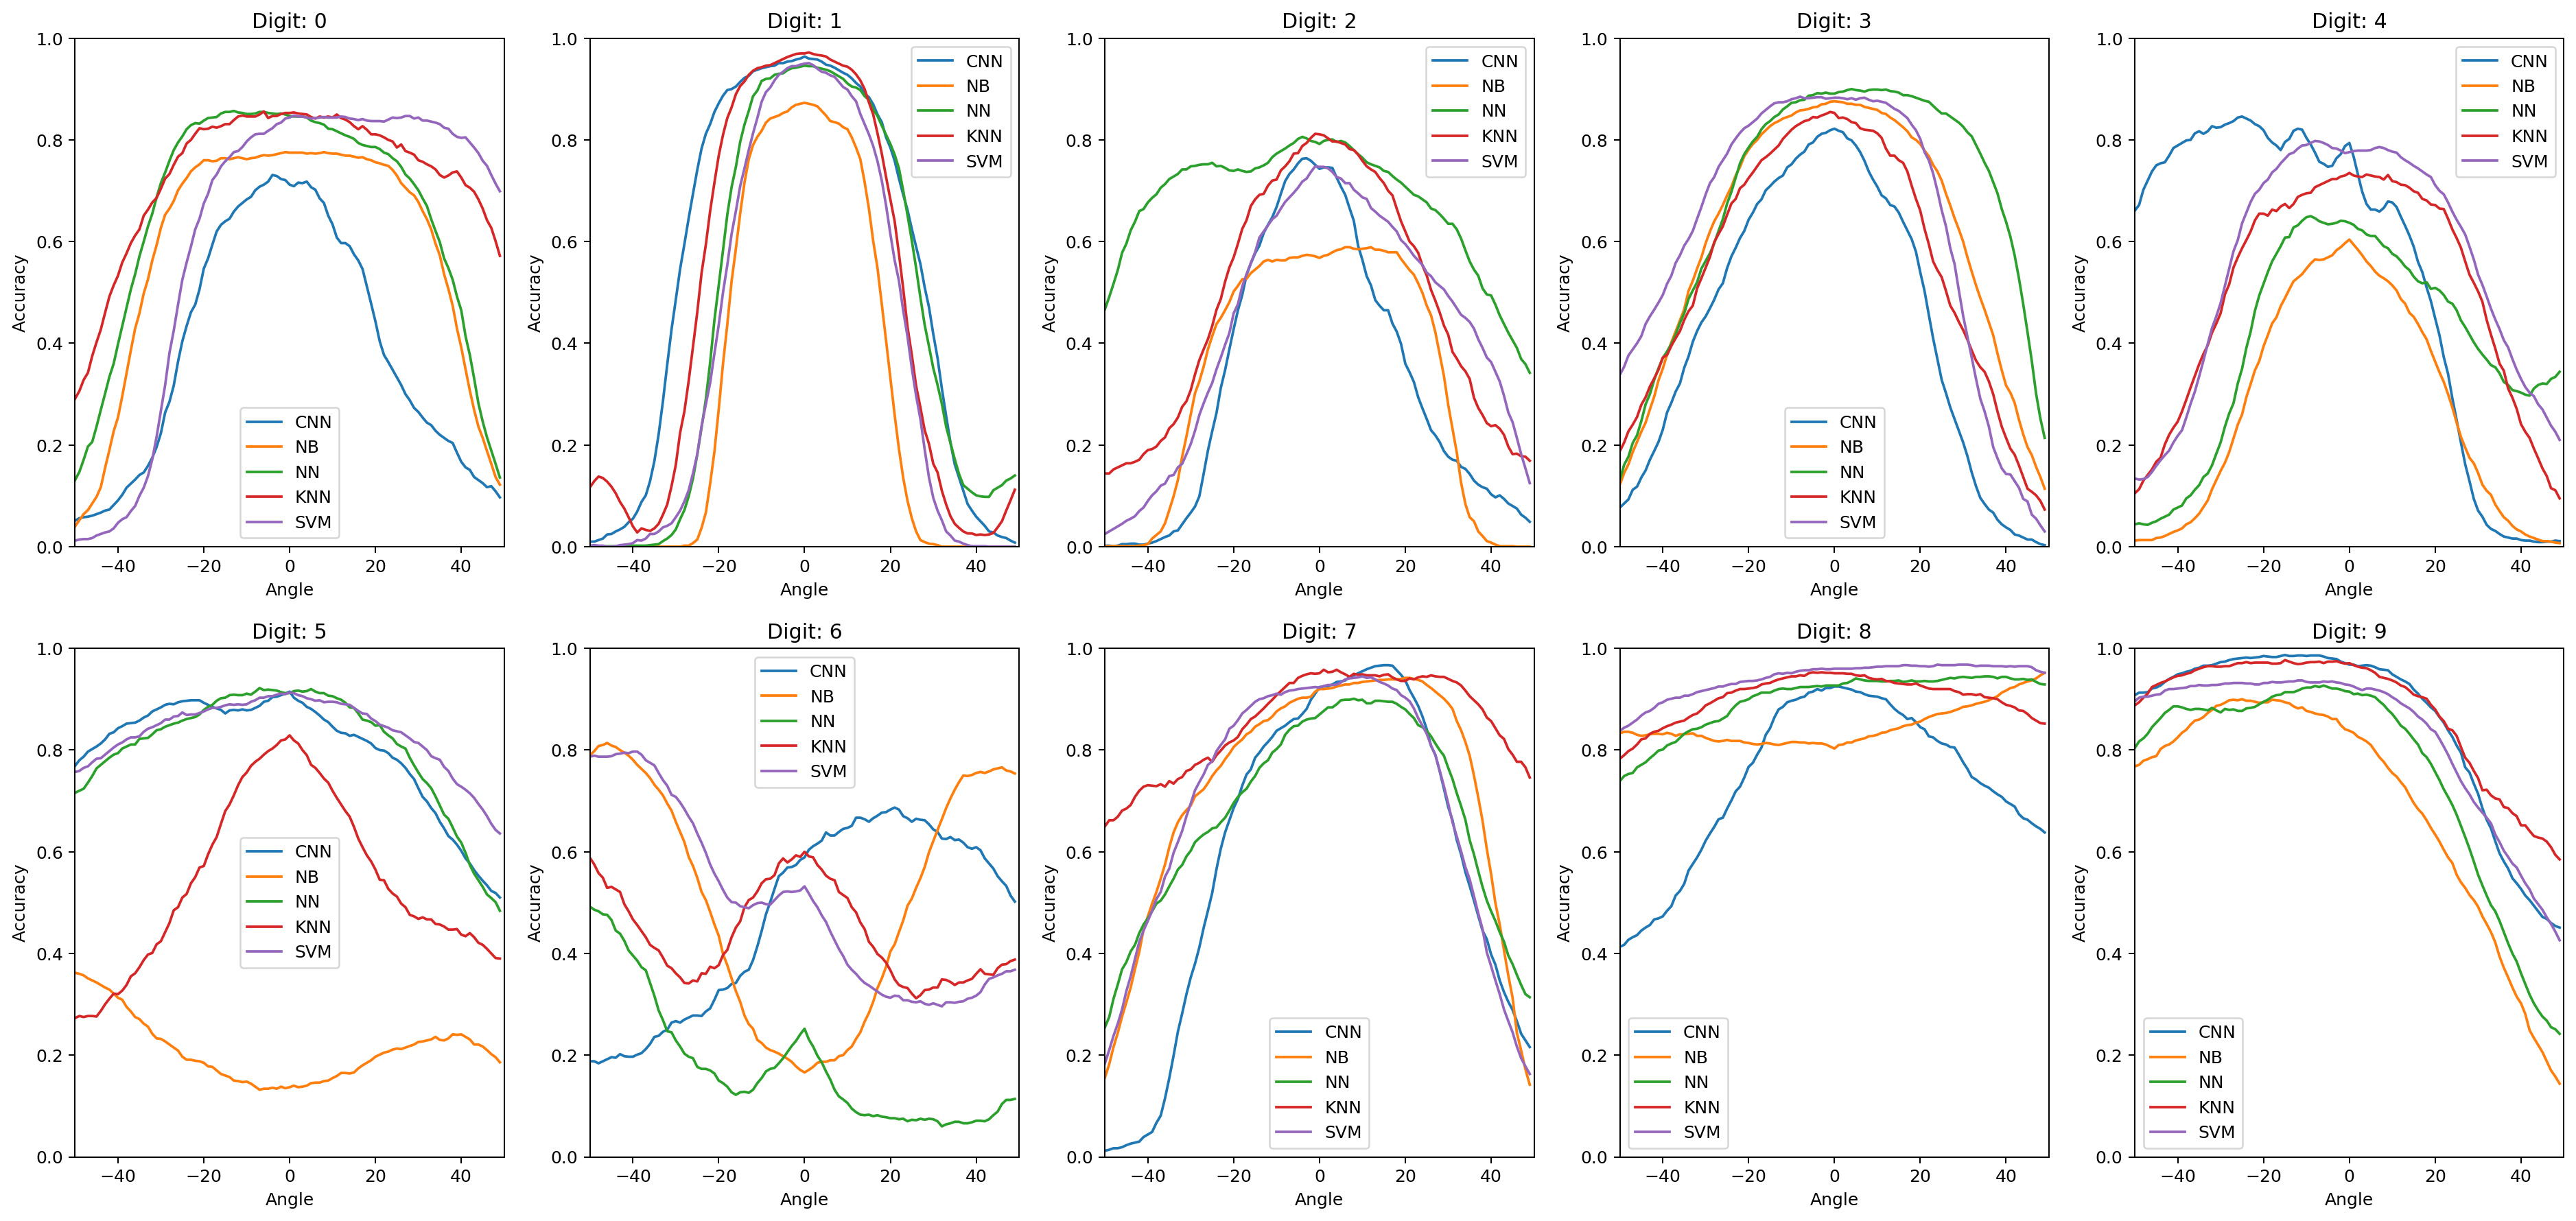

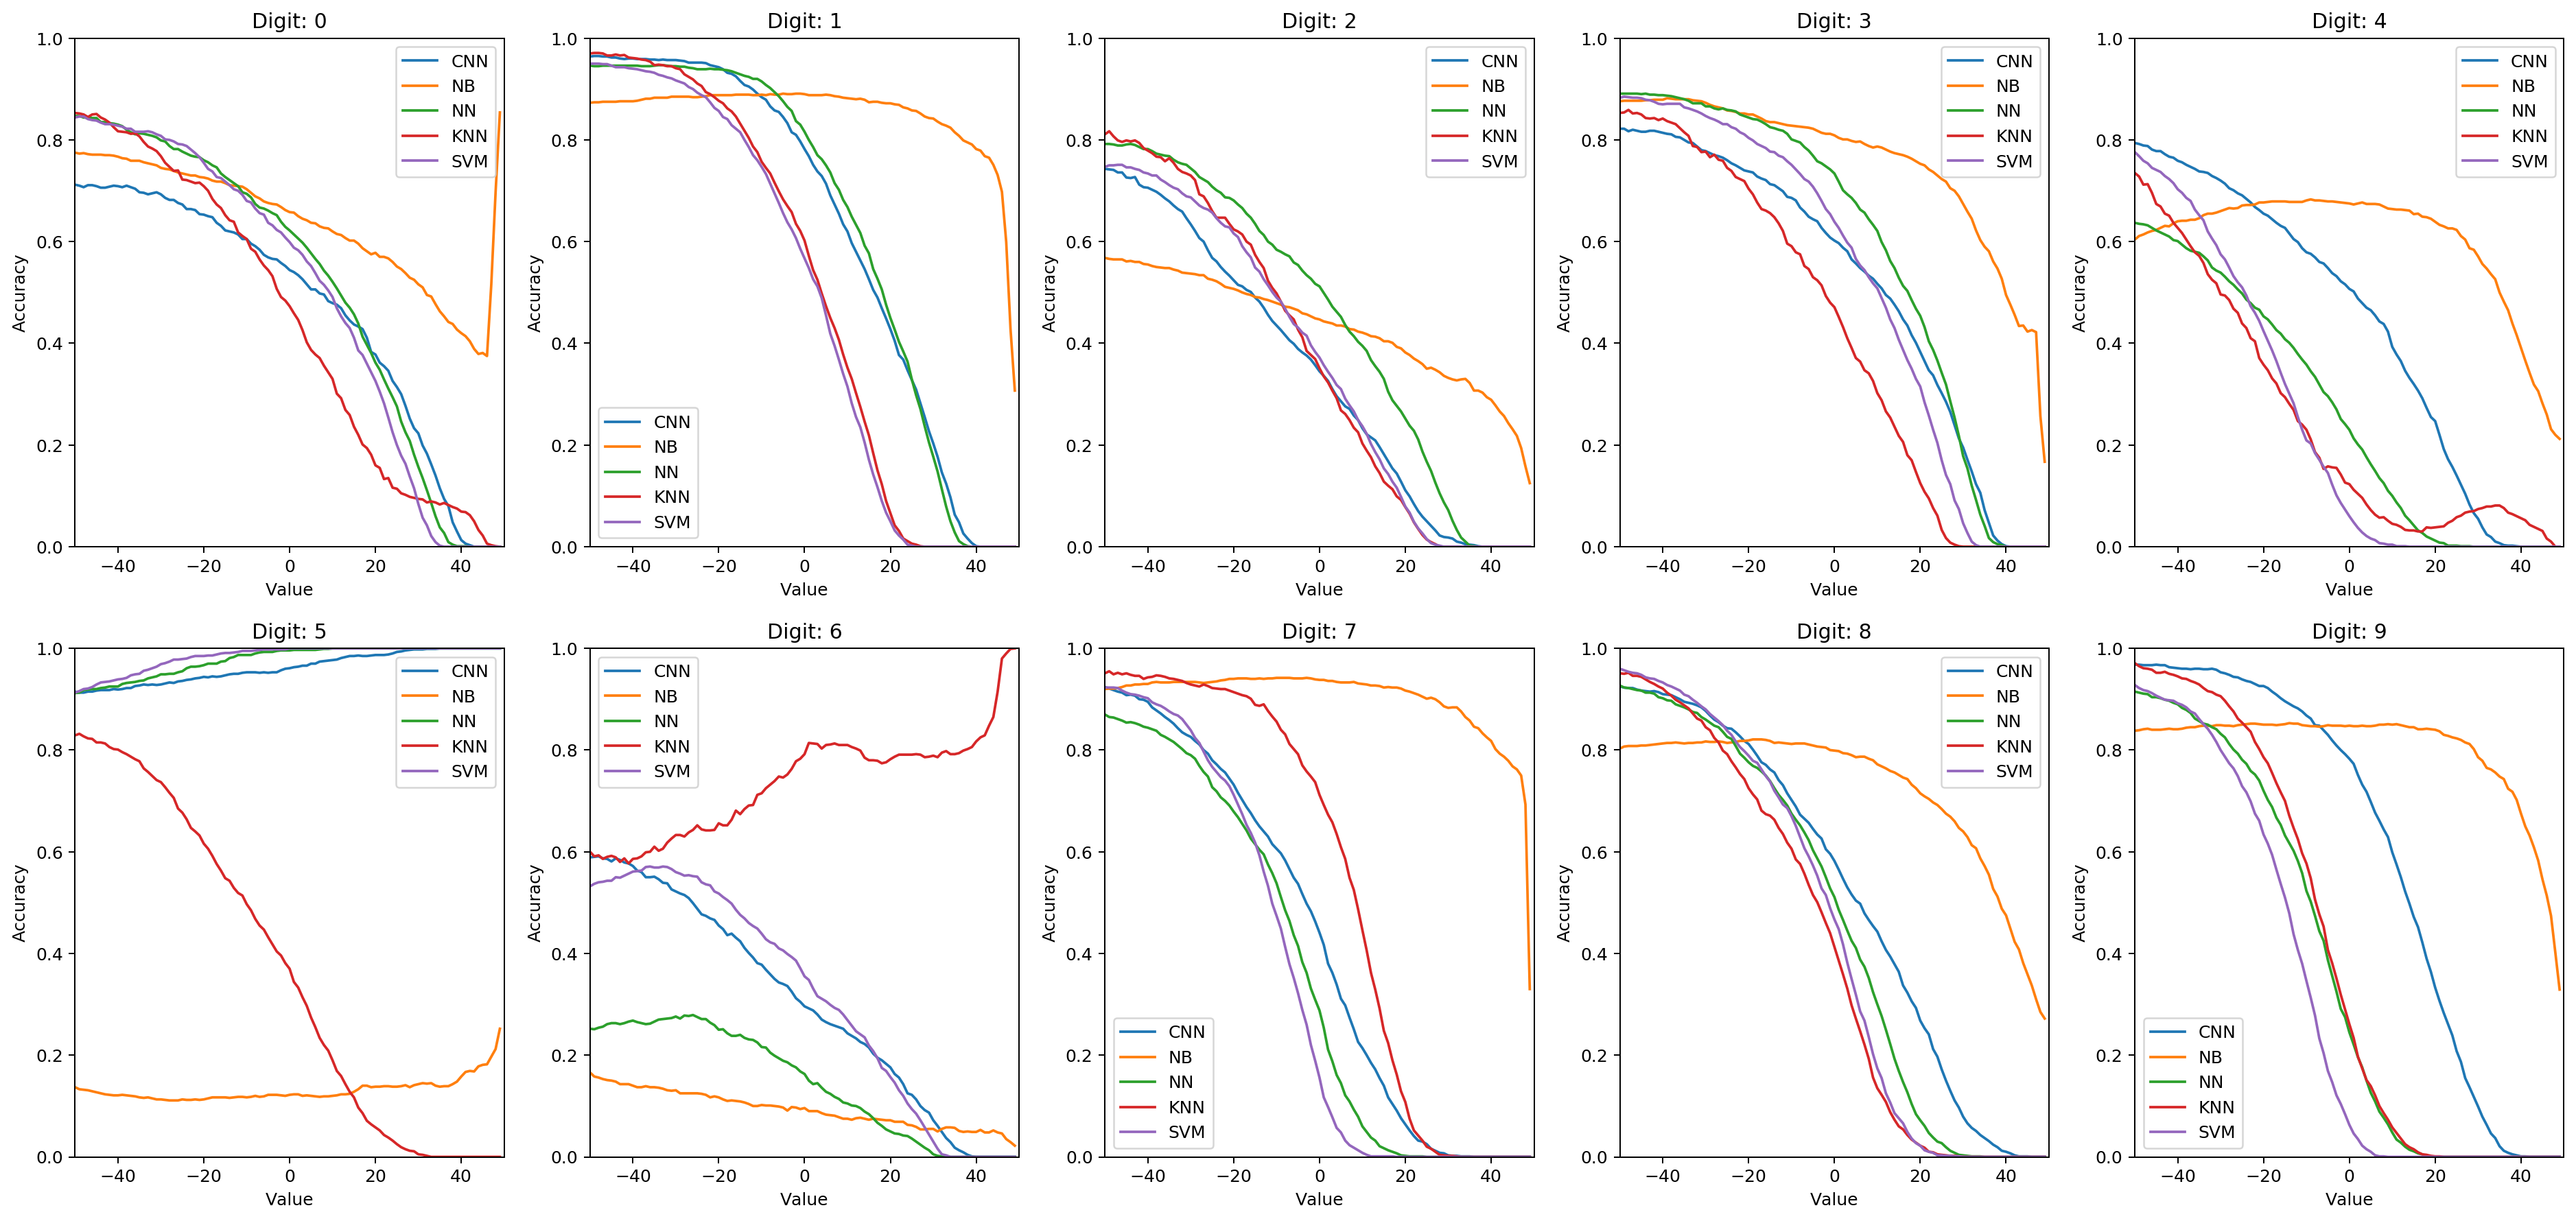

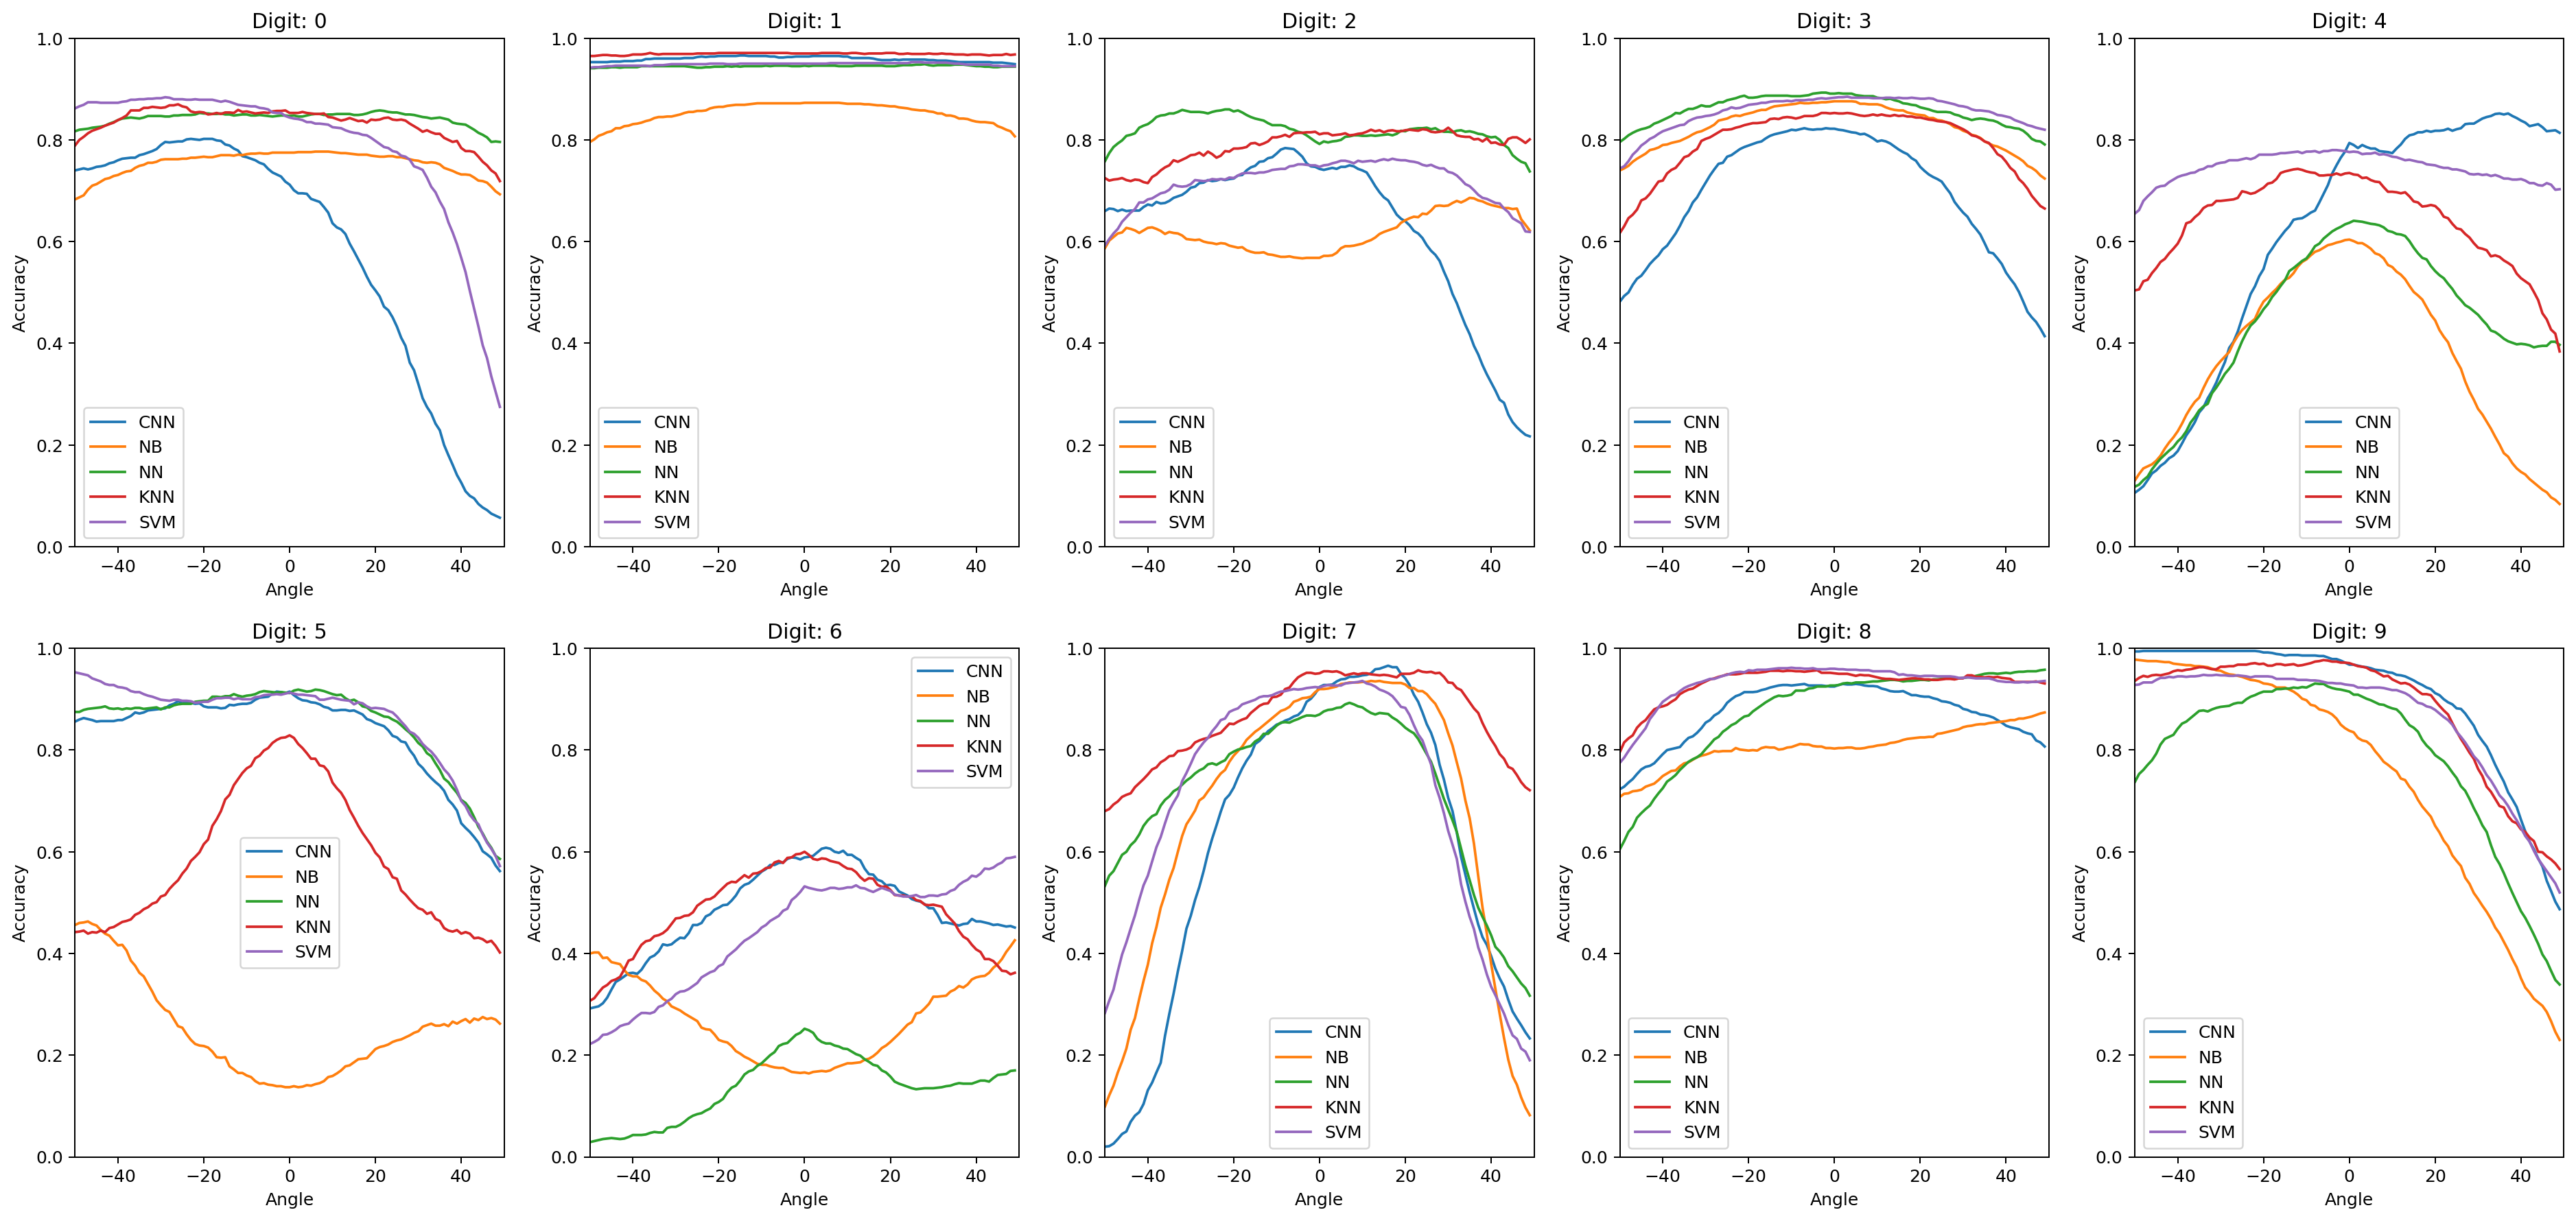

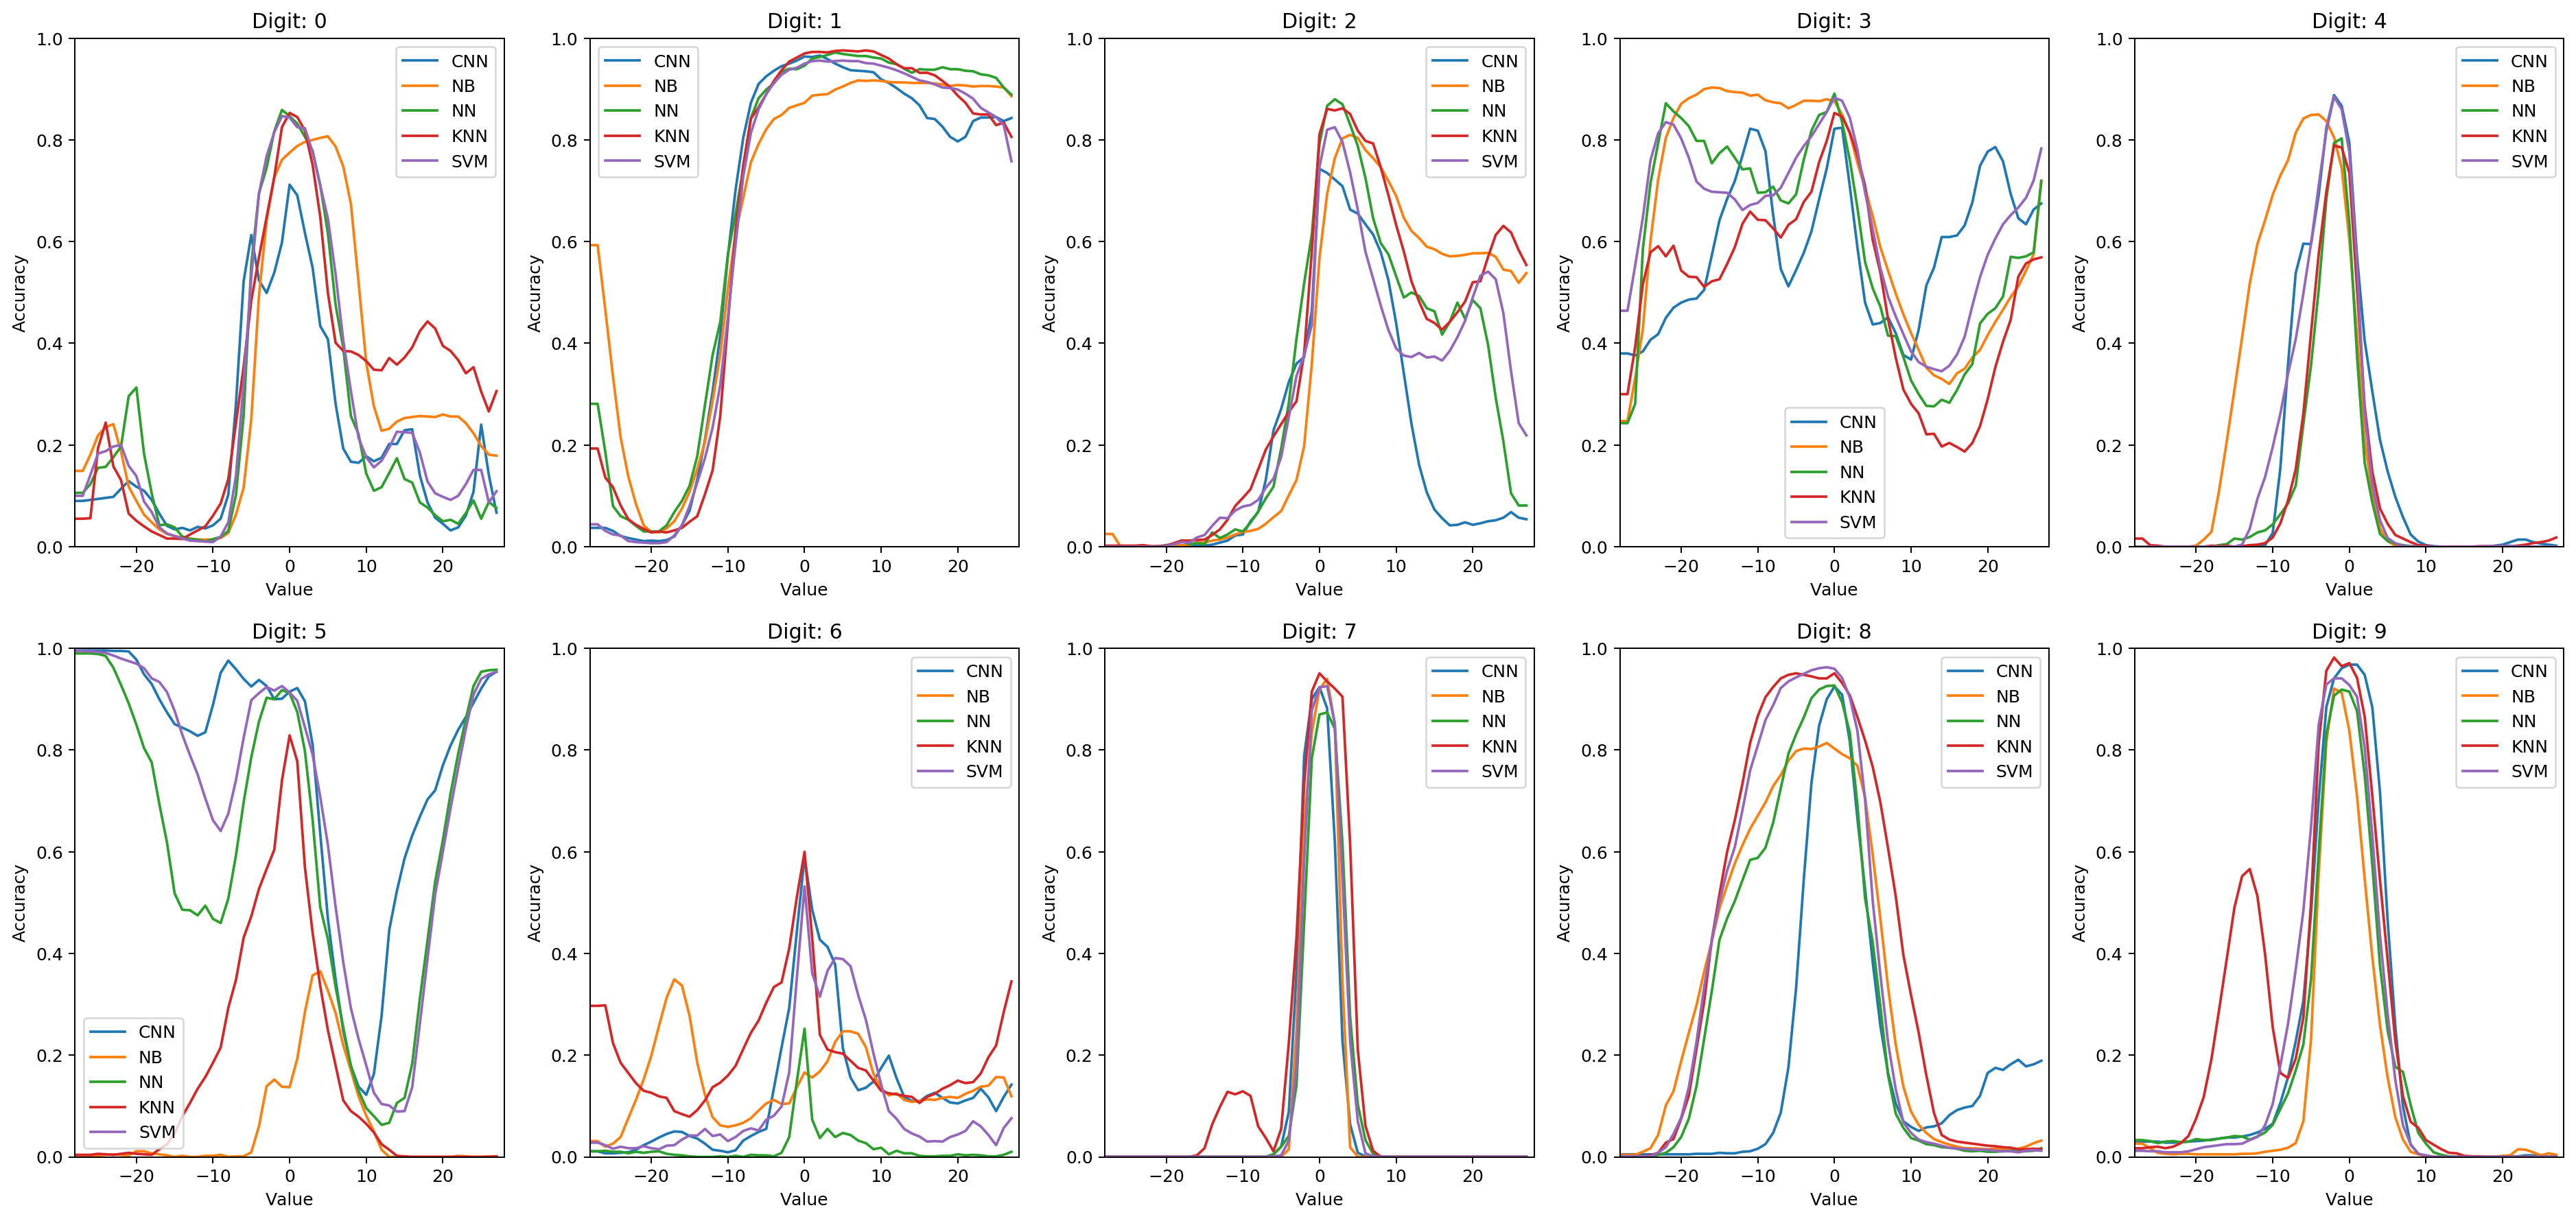

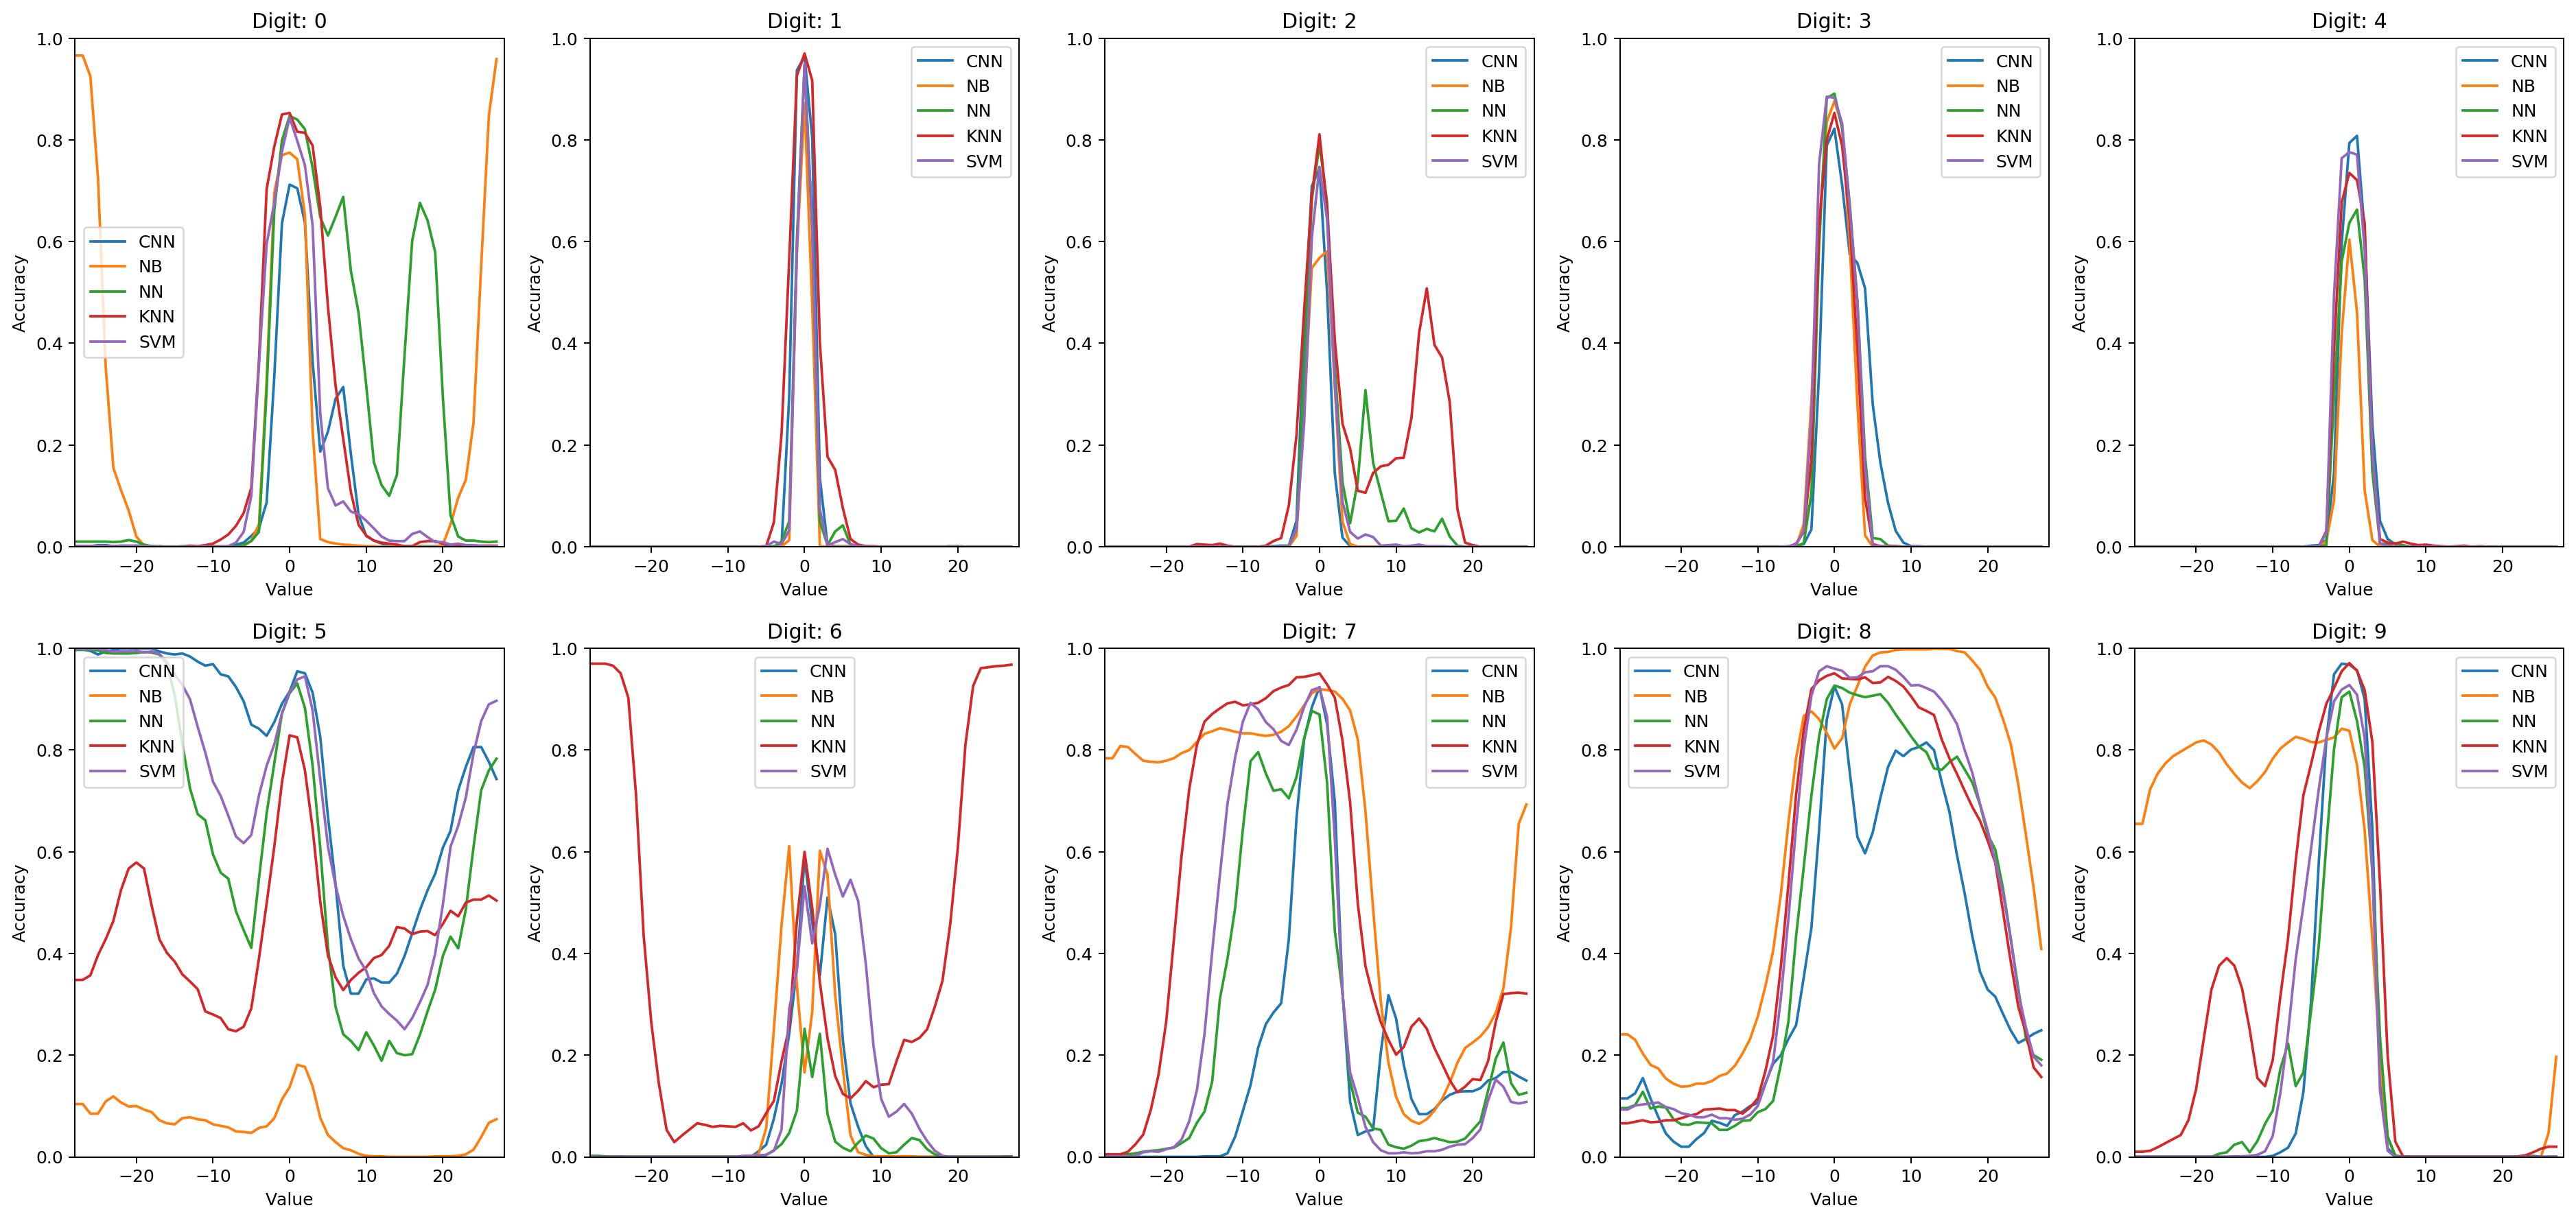

In [5]:
for MT in [Rotate, Shade, Shear, ShiftX, ShiftY]:
    getClassAccuracyPlot(MT)

# Recommendations for transformation parameters


| Class ||Rotate|| Shade|| Shear     ||ShiftX  ||ShiftY |
|:--:|:---:|:--:|:--:|:--:|:---:|:--:|:--:|:--:|:--:|--:|
|    |Min  |Max |Min |Max |  Min|Max | Min|Max | Min|Max|
| 0  | -14 | 9  | 0  | 53 | -47 | 9  | 0  | 1  |  0 | 1 | 
| 1  | -10 | 11 | 0  | 52 | -50 | 49 | -5 | 15 | -1 | 0 | 
| 2  | -8  | 6  | 0  | 52 | -38 | 16 | 0  | 3  | -1 | 0 | 
| 3  | -11 | 7  | 0  | 52 | -28 | 20 | -1 | 1  | -1 | 0 |
| 4  | -10 | 2  | 1  | 50 | -4  | 10 | -3 | 0  |  0 | 1 | 
| 5  | -11 | 7  | 0  | 52 | -11 | 9  | 0  | 1  |  0 | 2 | 
| 6  | -2  | 1  | 40 | 51 | -3  | 3  | 0  | 9  | -4 | 5 | 
| 7  | -10 | 25 | 0  | 50 | -12 | 23 | -1 | 1  | -1 | 0 | 
| 8  | -15 | 21 | 0  | 51 | -26 | 45 | -2 | 1  | -1 | 1 | 
| 9  | -47 | 10 | 0  | 50 | -42 | 11 | -3 | 0  | -1 | 1 | 


In [3]:
with open("../"+str(dataset)+"/data/"+str(Shear)+"/"+str(50), 'rb') as f:
    [xTestOri, yTestOri] = pickle.load(f)
xTestOri = np.array(xTestOri)
yTestOri = np.array(yTestOri)
xTestOri = xTestOri.reshape( 10000,  784)
yTestOri = yTestOri.reshape(10000)

model_dir = "models/CNN"
model = tf.estimator.Estimator(model_fn, model_dir=model_dir)
p,a = TestModel (model, xTestOri,yTestOri, False)
print("Accuracy of CNN Algorithm: "+str(a))

model_dir = "models/NN"
model = tf.estimator.Estimator(nn_model_fn, model_dir=model_dir)
p,a = TestModel (model, xTestOri,yTestOri, False)
print("Accuracy of NN Algorithm: "+str(a))

clf = pickle.load(open("models/NBModel", 'rb'))
p = clf.predict(xTestOri)
a = accuracy_score(yTestOri, p)
print("Accuracy of NB Algorithm: "+str(a))

clf = pickle.load(open("models/SVMModel", 'rb'))
p = clf.predict(xTestOri)
a = accuracy_score(yTestOri, p)
print("Accuracy of SVM Algorithm: "+str(a))

neigh = pickle.load(open("models/KNNModel", 'rb'))
p = neigh.predict(xTestOri)
a = accuracy_score(yTestOri, p)
print("Accuracy of KNN Algorithm: "+str(a))


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'models/CNN', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2b32526d38d0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Restoring parameters from models/CNN/model.ckpt-500
Accuracy of CNN Algorithm: 0.8356
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'models/NN', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_st

In [5]:
with open("data/Robustness/data", 'rb') as f:
    [xTestOri, yTestOri] = pickle.load(f)
xTestOri = np.array(xTestOri)
yTestOri = np.array(yTestOri)

model_dir = "models/CNN"
model = tf.estimator.Estimator(model_fn, model_dir=model_dir)
p,a = TestModel (model, xTestOri,yTestOri, False)
print("Accuracy of CNN Algorithm: "+str(a))

model_dir = "models/NN"
model = tf.estimator.Estimator(nn_model_fn, model_dir=model_dir)
p,a = TestModel (model, xTestOri,yTestOri, False)
print("Accuracy of NN Algorithm: "+str(a))

clf = pickle.load(open("models/NBModel", 'rb'))
p = clf.predict(xTestOri)
a = accuracy_score(yTestOri, p)
print("Accuracy of NB Algorithm: "+str(a))

clf = pickle.load(open("models/SVMModel", 'rb'))
p = clf.predict(xTestOri)
a = accuracy_score(yTestOri, p)
print("Accuracy of SVM Algorithm: "+str(a))

neigh = pickle.load(open("models/KNNModel", 'rb'))
p = neigh.predict(xTestOri)
a = accuracy_score(yTestOri, p)
print("Accuracy of KNN Algorithm: "+str(a))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'models/CNN', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2b331aedf128>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Restoring parameters from models/CNN/model.ckpt-500
Accuracy of CNN Algorithm: 0.7934
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'models/NN', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_st

In [1]:
AccOriginalData = [83.56, 79.89, 65.6, 84.56, 85.24]
AccFollowupData = [79.34, 78.16, 67.18, 82.92, 80.9]

In [2]:
zip_object = zip(AccOriginalData, AccFollowupData)
difference = []
for list1_i, list2_i in zip_object:

    difference.append(list1_i-list2_i)
print(difference)

[4.219999999999999, 1.730000000000004, -1.5800000000000125, 1.6400000000000006, 4.339999999999989]
